In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the enriched CSV from Level 2
df = pd.read_csv('output/Railway_info_enriched.csv')

print(" Data loaded!")
print(df.head())


 Data loaded!
   Train_No    Train_Name Source_Station_Name  \
0       107  SWV-MAO-VLNK     SAWANTWADI ROAD   
1       108  VLNK-MAO-SWV         MADGOAN JN.   
2       128  MAO-KOP SPEC         MADGOAN JN.   
3       290  PALACE ON WH   DELHI-SAFDAR JANG   
4       401  BSB BHARATDA          AURANGABAD   

             Destination_Station_Name       days  Num_Days Train_Category  
0                         MADGOAN JN.   Saturday         1        Weekend  
1                     SAWANTWADI ROAD     Friday         1        Weekday  
2  CHHATRAPATI SHAHU MAHARAJ TERMINUS     Friday         1        Weekday  
3                   DELHI-SAFDAR JANG  Wednesday         1        Weekday  
4                        VARANASI JN.   Saturday         1        Weekend  


C:\Users\DELL\AppData\Local\Temp\ipykernel_5804\3281940715.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.index, y=source_counts.values, palette='Blues_r')


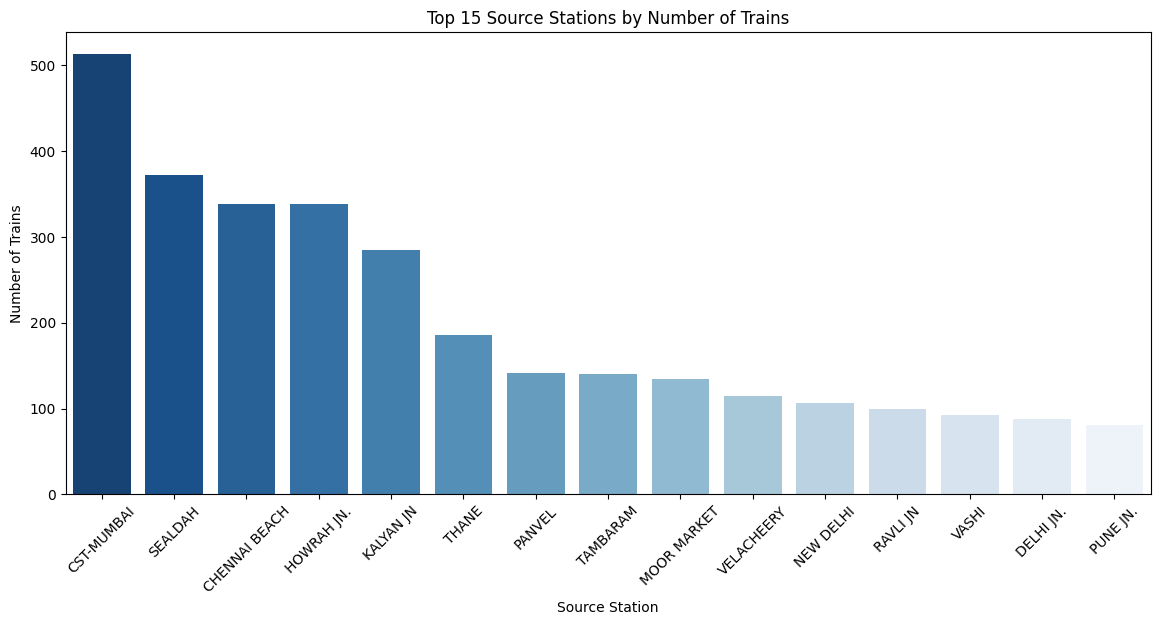

In [3]:
# Count trains per source station
source_counts = df['Source_Station_Name'].value_counts().head(15)

# Plot
plt.figure(figsize=(14,6))
sns.barplot(x=source_counts.index, y=source_counts.values, palette='Blues_r')
plt.title('Top 15 Source Stations by Number of Trains')
plt.xlabel('Source Station')
plt.ylabel('Number of Trains')
plt.xticks(rotation=45)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5804\3385094575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=destination_counts.index, y=destination_counts.values, palette='Greens_r')


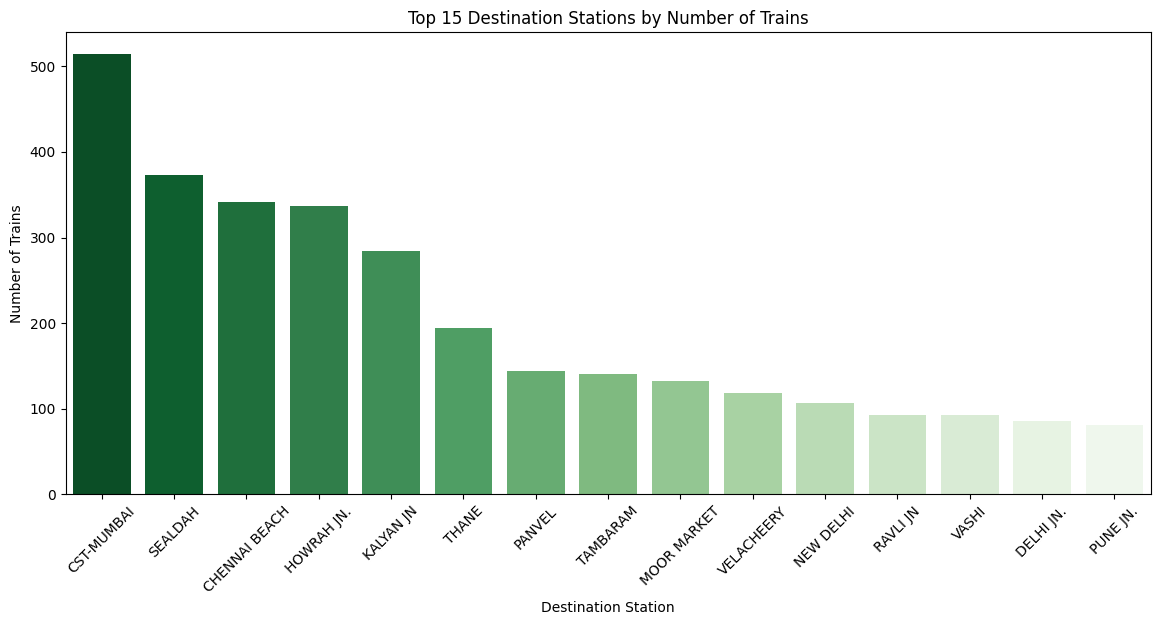

In [4]:
# Count trains per destination station
destination_counts = df['Destination_Station_Name'].value_counts().head(15)

# Plot
plt.figure(figsize=(14,6))
sns.barplot(x=destination_counts.index, y=destination_counts.values, palette='Greens_r')
plt.title('Top 15 Destination Stations by Number of Trains')
plt.xlabel('Destination Station')
plt.ylabel('Number of Trains')
plt.xticks(rotation=45)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5804\589572186.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette='Spectral')


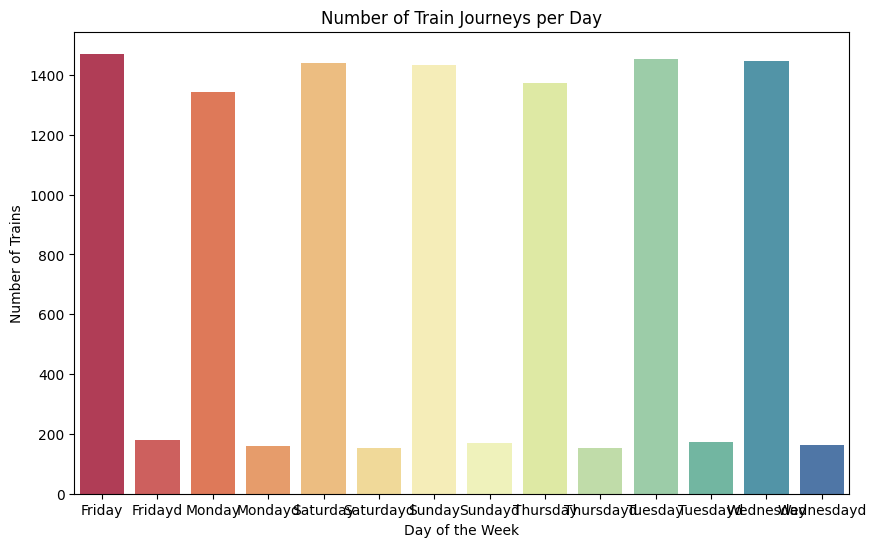

In [5]:
# Expand 'days' column for each day in its own row
df_expanded = df.copy()
df_expanded['days_list'] = df_expanded['days'].str.split(',')
df_exploded = df_expanded.explode('days_list')
df_exploded['days_list'] = df_exploded['days_list'].str.strip()

# Count number of trains per day
day_counts = df_exploded['days_list'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='Spectral')
plt.title('Number of Train Journeys per Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trains')
plt.show()

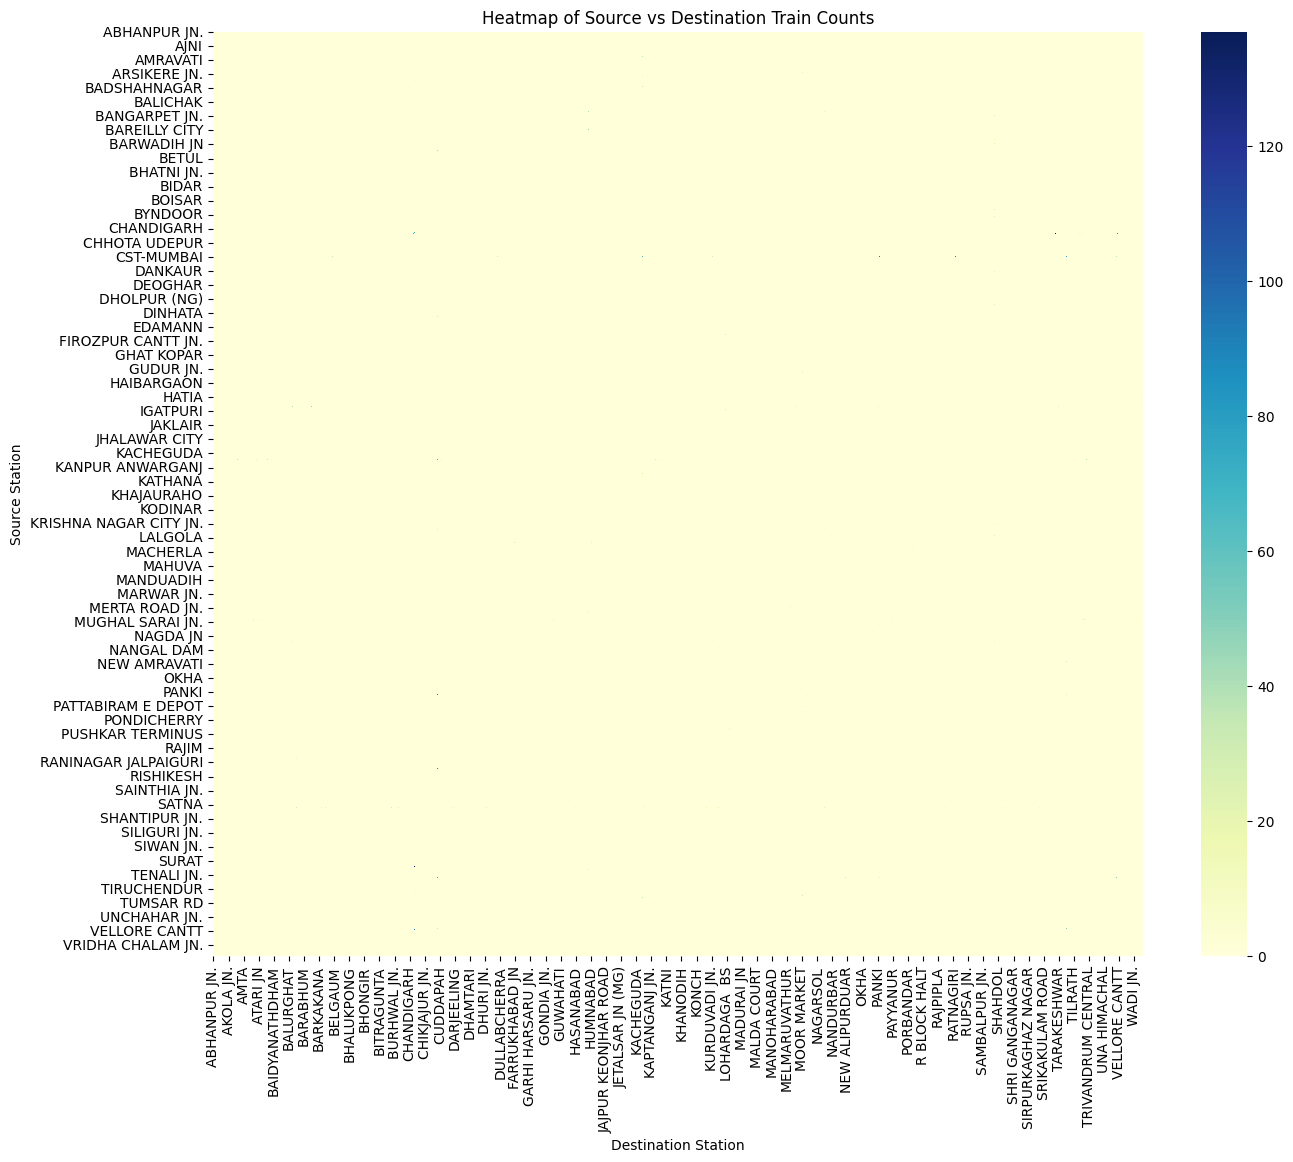

In [6]:
# Create pivot table
pivot = df.pivot_table(index='Source_Station_Name',
                       columns='Destination_Station_Name',
                       values='Train_No',
                       aggfunc='count',
                       fill_value=0)

# Heatmap
plt.figure(figsize=(15,12))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Heatmap of Source vs Destination Train Counts')
plt.xlabel('Destination Station')
plt.ylabel('Source Station')
plt.show()

In [9]:

# Save summary as a text file
with open('output/summary_report.txt', 'w') as f:
    f.write("""
RAILWAY DATA ANALYSIS REPORT
----------------------------
KEY INSIGHTS:

1. Major source and destination stations handle the bulk of traffic.
2. Weekdays have higher train operations compared to weekends.
3. Heatmap shows which routes are heavily used.
4. Recommendations:
   - Improve infrastructure at high-traffic stations.
   - Add more trains during peak weekday demand.
   - Plan maintenance and upgrades strategically.
""")

print("\n Report saved as: output/summary_report.txt")


 Report saved as: output/summary_report.txt
